# Laboratory work  3

**Обработка бинарных изображений. Морфология.**

Completed: гр.№ 6131-010402D, Griaznov Ilia

In [1]:
import operator
import random
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class cv3:
    def __init__(self):
        pass

    @classmethod
    def erodeIsTrue(cls,img, listOnes):
        listColor = []

        for m,n in listOnes:
             listColor.append(img[m,n])

        lst = list(set(listColor))
        if len(lst) == 1 and lst[0] == 255:
            return 255
        else:
            return  0

    @classmethod
    def dilateIsTrue(cls,img, listOnes):
        listColor = []

        for m,n in listOnes:
             listColor.append(img[m,n])

        lst = list(set(listColor))
        if len(lst) == 1 and lst[0] == 0:
            return 0
        else:
            return 255

    @classmethod
    def preparation(cls,img, mask):
        p = img.shape
        width = p[1]
        height = p[0]

        pM = mask.shape
        widthM = pM[1]
        heightM = pM[0]

        centerHeightM = int(np.ceil(heightM / 2) - 1)
        centerwidthM = int(np.ceil(widthM / 2) - 1)

        listOnes = []
        for i in range(heightM):
            for j in range(widthM):
                    if mask[i, j] == 1:
                        listOnes.append([i, j])

        img2 = np.zeros((height + centerHeightM * 2, width + centerwidthM * 2), np.uint8)
        img2[centerHeightM:height + centerHeightM, centerwidthM:width + centerwidthM] = img

        for i in range(centerHeightM):
            img2[i, :] = img2[centerHeightM, :]
            img2[height +1 + i, :] = img2[height, :]

        for i in range(centerwidthM):
           img2[:, i] = img2[:, centerwidthM]
           img2[:, width+1 + i] = img2[:, width]


        return width,height,centerHeightM,centerwidthM,img2, listOnes



    @staticmethod
    def dilate(img, mask):
        width,height,centerHeightM,centerwidthM,img2,listOnes = cv3.preparation(img,mask)
        img3 = np.copy(img2)

        for i in range(centerHeightM, height + centerHeightM):
            for j in range(centerwidthM, width + centerwidthM):
                chunk = img2[i - centerHeightM: i + centerHeightM + 1, j - centerwidthM: j + centerwidthM + 1]
                img3[i, j] = cv3.dilateIsTrue(chunk, listOnes)
        return img3[centerHeightM:height + centerHeightM, centerwidthM:width + centerwidthM]


    @staticmethod
    def erode(img, mask):
        width, height, centerHeightM, centerwidthM, img2, listOnes = cv3.preparation(img, mask)
        img3 = np.copy(img2)

        for i in range(centerHeightM, height + centerHeightM):
            for j in range(centerwidthM, width + centerwidthM):
                chunk = img2[i - centerHeightM: i + centerHeightM + 1, j - centerwidthM: j + centerwidthM + 1]
                img3[i, j] = cv3.erodeIsTrue(chunk, listOnes)
        return img3[centerHeightM:height + centerHeightM, centerwidthM:width + centerwidthM]

    @staticmethod
    def open(img, mask):
        img2 = cv3.erode(img, mask)
        return cv3.dilate(img2, mask)

    @staticmethod
    def close(img, mask):
        img2 = cv3.dilate(img, mask)
        return cv3.erode(img2, mask)


    @staticmethod
    def addNoise(im, noise_percentage):
        vals = len(im.flatten())
        p = img.shape
        width = p[1]
        height = p[0]
        listAllCoord = []
        for i in range(height):
            for j in range(width):
                listAllCoord.append([i, j])
        out = np.copy(im)
        num_salt = int(np.ceil(noise_percentage * vals / 100))
        random.shuffle(listAllCoord)


        for i in range(num_salt):

            if img[listAllCoord[i][0], listAllCoord[i][1]] == 255:
                out[listAllCoord[i][0], listAllCoord[i][1]] = 0
            else:
                out[listAllCoord[i][0], listAllCoord[i][1]] = 255
        return out

    @staticmethod
    def noise_percentage(img, img2):
        p = img.shape
        width = p[1]
        height = p[0]
        img3 = img
        countNoise = 0
        for i in range(height):
            for j in range(width):
                if (operator.xor(img2[i, j], img[i, j])) == 255:
                    countNoise += 1

        #print("Отношение : ", countNoise * 100 / (width * height))
        return countNoise * 100 / (width * height)

    @staticmethod
    def contour(img, mask):
        dilation = cv3.dilate(img, mask).astype(np.uint8)
        return dilation ^ img
    
    @staticmethod
    def contour_e(img, mask):
        erosion = cv3.erode(img, mask).astype(np.uint8)
        return erosion ^ img
    

    @staticmethod
    def threshold_processing(img, threshold):
        p = img.shape
        width = p[1]
        height = p[0]

        for i in range(height):
            for j in range(width):
                if (img[i, j] > threshold):
                    img[i, j] = 255
                else:
                    img[i, j] = 0
        return img

    @classmethod
    def isChange(cls,img,listOnes):
        listColor = []
        for m, n in listOnes:
            listColor.append(img[m, n])

        if listColor[2] == 0:
            lst = list(set(listColor[0:2] + listColor[3:]))
            if len(lst) == 1 and lst[0] == 255:
                return 255
            else:
                return 0

        else:
            lst = list(set(listColor[0:2] + listColor[3:]))
            if len(lst) == 1 and lst[0] == 0:
                return 0
            else:
                return 255

    @staticmethod
    def truth_table(img,mask):


        width,height,centerHeightM,centerwidthM,img2,listOnes = cv3.preparation(img,mask)

        img3 = np.copy(img2)

        for i in range(centerHeightM, height + centerHeightM):
            for j in range(centerwidthM, width + centerwidthM):
                chunk = img2[i - centerHeightM: i + centerHeightM + 1, j - centerwidthM: j + centerwidthM + 1]
                img3[i, j] = cv3.isChange(chunk, listOnes)
        return img3[centerHeightM:height + centerHeightM, centerwidthM:width + centerwidthM]

---
---
# Исходное изображение и структурный элемент
---
---

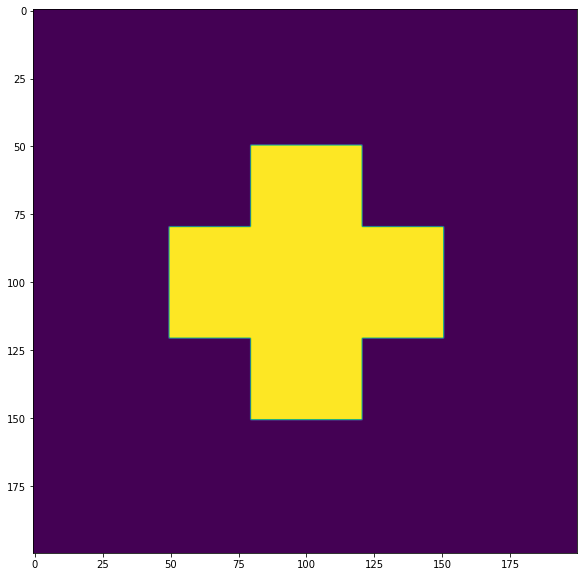

In [3]:
height, width = 200, 200
img = np.full(shape=(height, width), fill_value=0)

cv2.rectangle(img, pt1=(50, 80), pt2= (150, 120), color=(1,1,1), thickness= -1)
cv2.rectangle(img, pt1=(80,50), pt2=(120, 150), color=(1,1,1), thickness = -1)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.imshow(img)
plt.show()

In [4]:
 img = cv2.imread(r'rec.jpg', 0)
# крест
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])

img = cv3.threshold_processing(img, 195)


### Зашумление и фильтрация


### Обработка с помощью эрозии

### Шум 1% + обработка

In [5]:
noise1 = cv3.addNoise(img, 1)
e1 = cv3.erode(noise1,kernel)
cv3.noise_percentage(noise1,e1)

3.9166324694592634

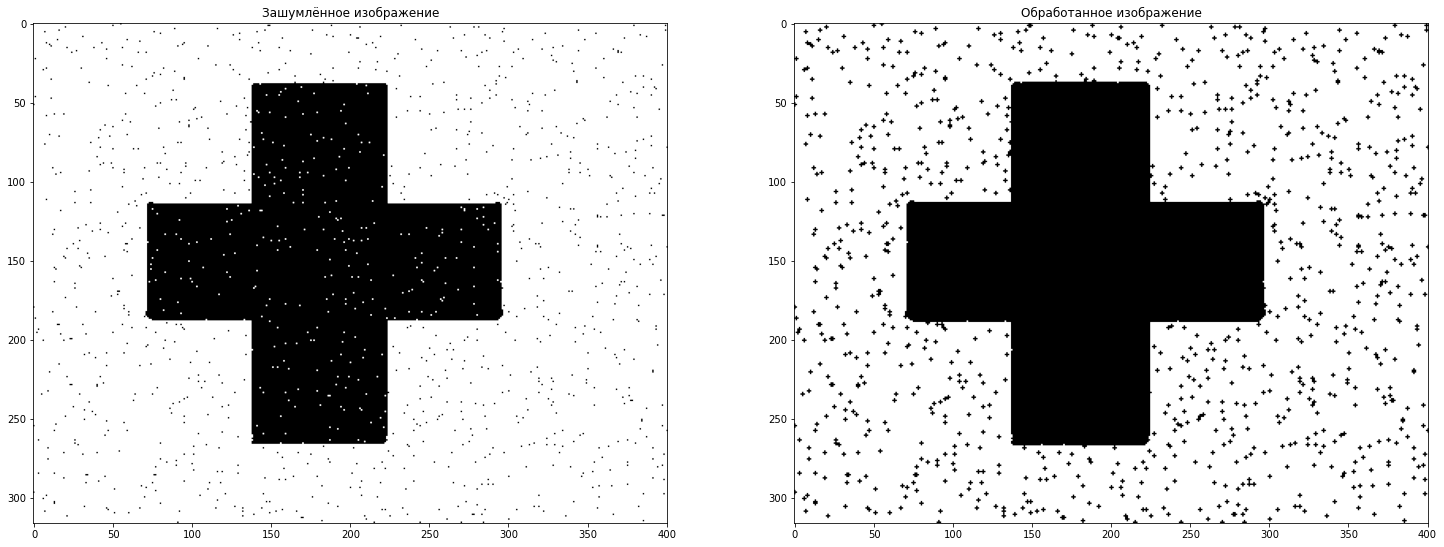

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise1, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(e1, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 2% + обработка

In [7]:
noise2 = cv3.addNoise(img, 2)
e2 = cv3.erode(noise2,kernel)

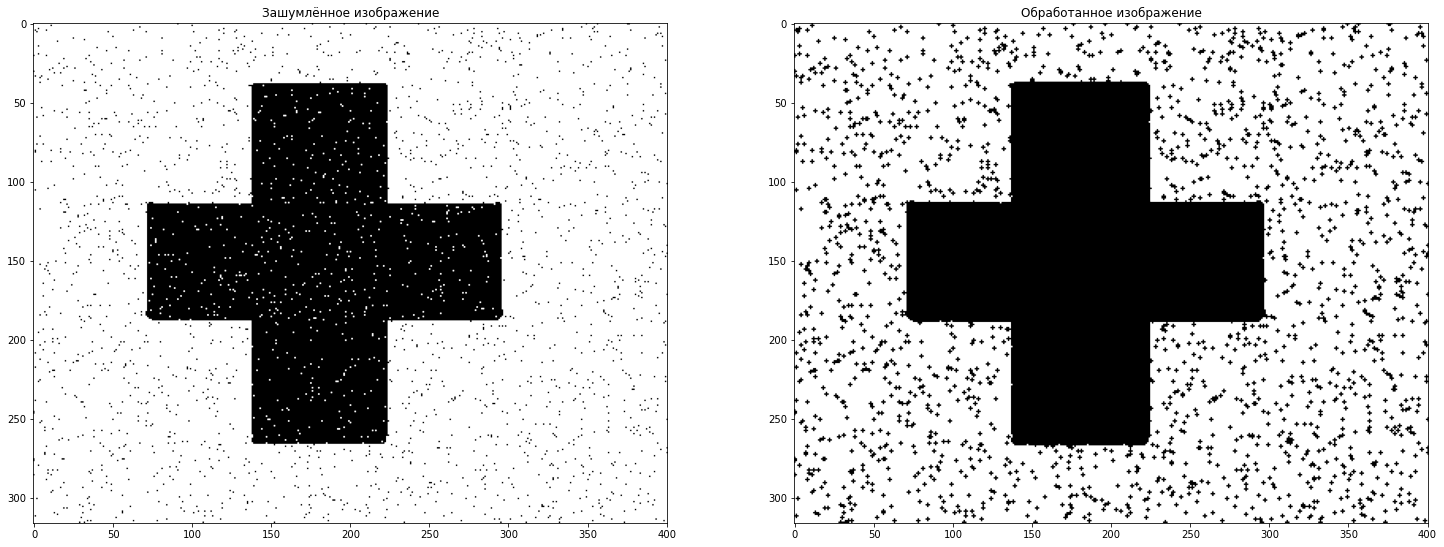

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise2, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(e2, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 5% + обработка

In [9]:
noise5 = cv3.addNoise(img, 5)
e5 = cv3.erode(noise5,kernel)

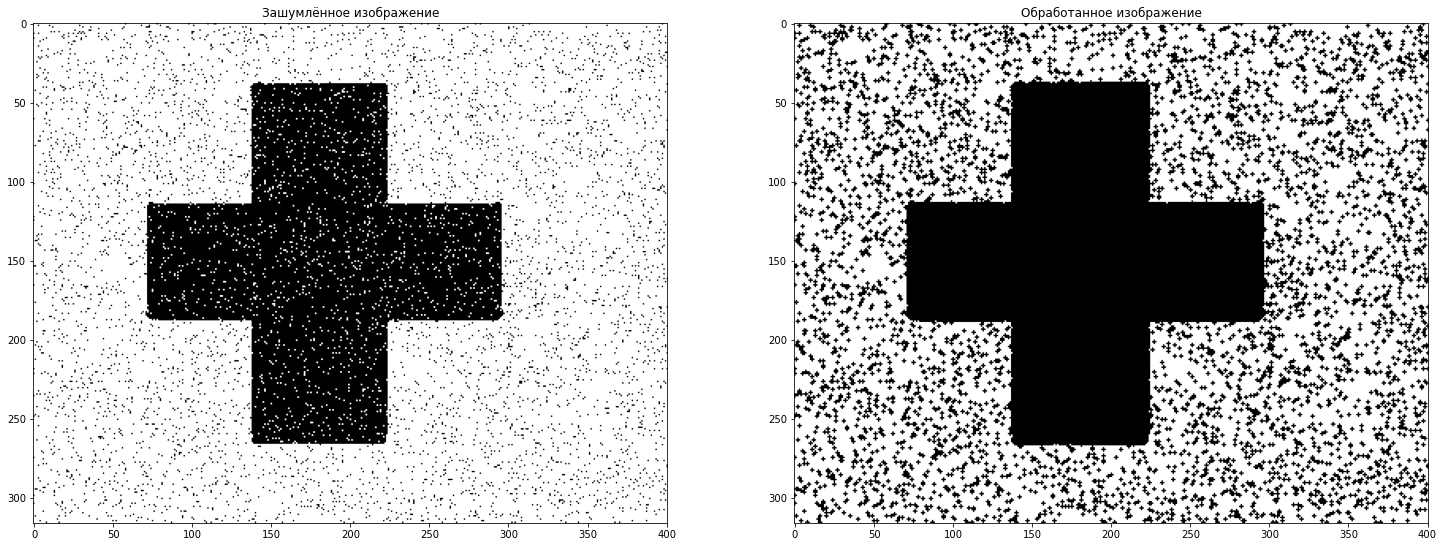

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise5, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(e5, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 10% + обработка

In [11]:
noise10 = cv3.addNoise(img, 10)
e10 = cv3.erode(noise10,kernel)

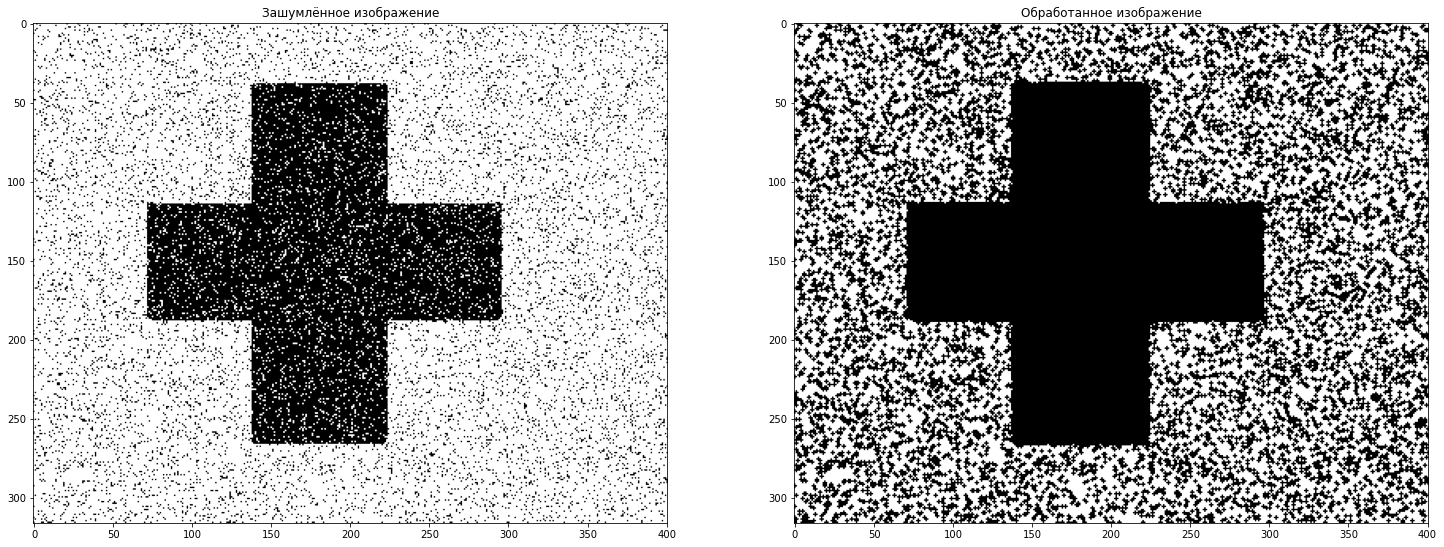

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise10, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(e10, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 20% + обработка

In [13]:
noise20 = cv3.addNoise(img, 20)
e20 = cv3.erode(noise20,kernel)

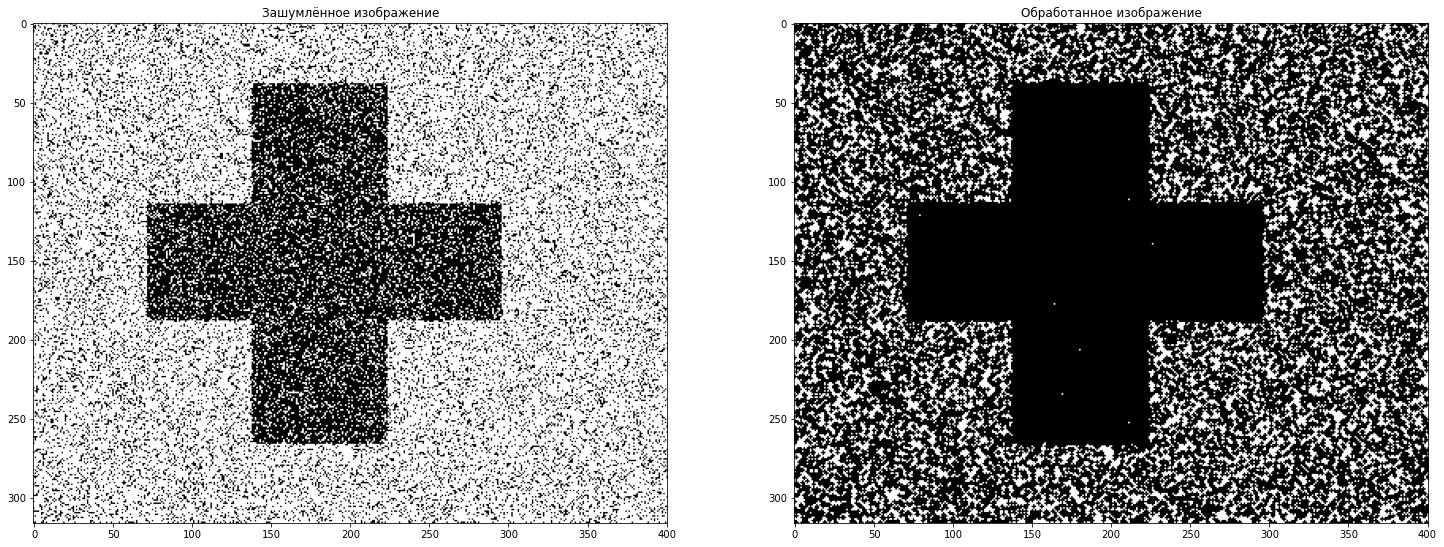

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise20, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(e20, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 50% + обработка

In [15]:
noise50 = cv3.addNoise(img, 50)
e50 = cv3.erode(noise50,kernel)

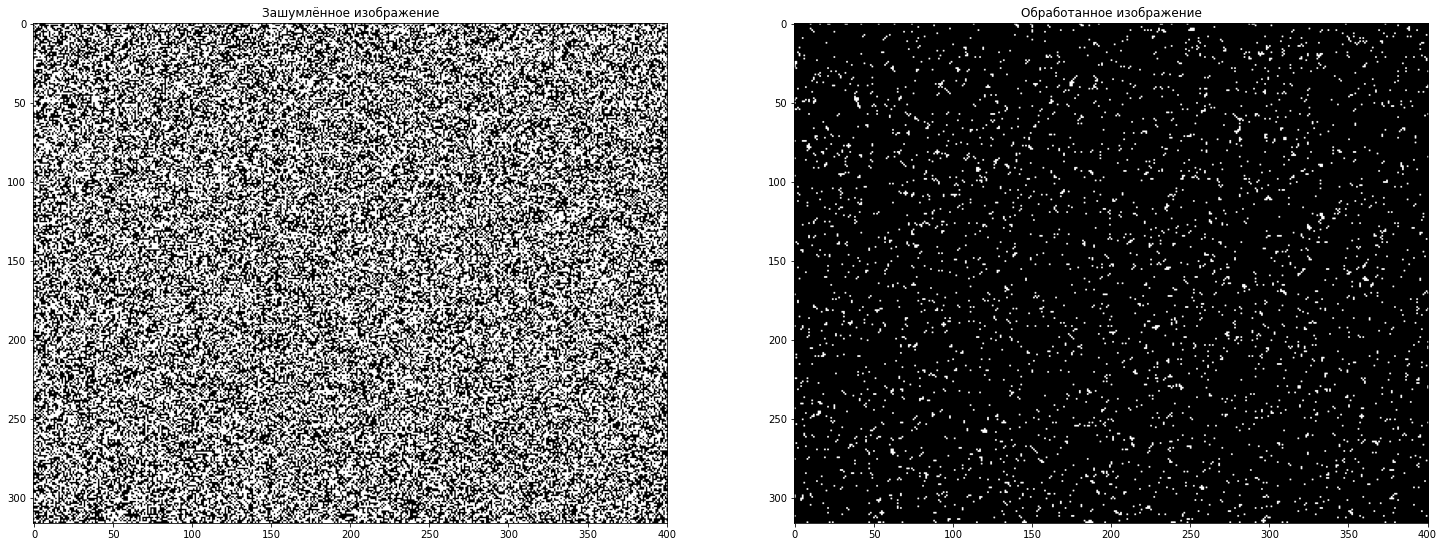

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise50, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(e50, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

## Обработка с помощью дилатации

### Шум 1% + обработка

In [17]:
noise1 = cv3.addNoise(img, 1)
d1 = cv3.dilate(noise1,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise1, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(d1, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 2% + обработка

In [ ]:
noise2 = cv3.addNoise(img, 2)
d2 = cv3.dilate(noise2,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise2, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(d2, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 5% + обработка

In [ ]:
noise5 = cv3.addNoise(img, 5)
d5 = cv3.dilate(noise5,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise5, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(d5, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 10% + обработка

In [ ]:
noise10 = cv3.addNoise(img, 10)
d10 = cv3.dilate(noise10,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise10, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(d10, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 20% + обработка

In [ ]:
noise20 = cv3.addNoise(img, 20)
d20 = cv3.dilate(noise20,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise20, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(d20, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 50% + обработка

In [ ]:
noise50 = cv3.addNoise(img, 50)
d50 = cv3.dilate(noise50,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise50, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(d50, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

## Обработка с помощью логической операции "Вскрытие"

### Шум 1% + обработка

In [ ]:
noise1 = cv3.addNoise(img, 1)
o1 = cv3.open(noise1,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise1, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(o1, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 2% + обработка

In [ ]:
noise2 = cv3.addNoise(img, 2)
o2 = cv3.open(noise2,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise2, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(o2, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 5% + обработка

In [ ]:
noise5 = cv3.addNoise(img, 5)
o5 = cv3.open(noise5,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise5, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(o5, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 10% + обработка

In [ ]:
noise10 = cv3.addNoise(img, 10)
o10 = cv3.open(noise10,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise10, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(o10, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 20% + обработка

In [ ]:
noise20 = cv3.addNoise(img, 20)
o20 = cv3.open(noise20,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise20, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(o20, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 50% + обработка

In [ ]:
noise50 = cv3.addNoise(img, 50)
o50 = cv3.open(noise50,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise50, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(o50, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

## Обработка с помощью логической операции "Закрытие"

### Шум 1% + обработка

In [ ]:
noise1 = cv3.addNoise(img, 1)
close1 = cv3.close(noise1,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise1, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(close1, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 2% + обработка

In [ ]:
noise2 = cv3.addNoise(img, 2)
close2 = cv3.close(noise2,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise2, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(close2, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 5% + обработка

In [ ]:
noise5 = cv3.addNoise(img, 5)
close5 = cv3.close(noise5,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise5, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(close5, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 10% + обработка

In [ ]:
noise10 = cv3.addNoise(img, 10)
close10 = cv3.close(noise10,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise10, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(close10, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 20% + обработка

In [ ]:
noise20 = cv3.addNoise(img, 20)
close20 = cv3.close(noise20,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise20, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(close20, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 50% + обработка

In [ ]:
noise50 = cv3.addNoise(img, 50)
close50 = cv3.close(noise50,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise50, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(close50, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

## Обработка с помощью 'Truth Table'

### Шум 1% + обработка

In [ ]:
noise1 = cv3.addNoise(img, 1)
truth1 = cv3.truth_table(noise1,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise1, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(truth1, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 2% + обработка

In [ ]:
noise2 = cv3.addNoise(img, 2)
truth2 = cv3.truth_table(noise2,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise2, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(truth2, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 5% + обработка

In [ ]:
noise5 = cv3.addNoise(img, 5)
truth5 = cv3.truth_table(noise5,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise5, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(truth5, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 10% + обработка

In [ ]:
noise10 = cv3.addNoise(img, 10)
truth10 = cv3.truth_table(noise10,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise10, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(truth10, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 20% + обработка

In [ ]:
noise20 = cv3.addNoise(img, 20)
truth20 = cv3.truth_table(noise20,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise20, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(truth20, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

### Шум 50% + обработка

In [ ]:
noise50 = cv3.addNoise(img, 50)
truth50 = cv3.truth_table(noise50,kernel)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].imshow(noise50, vmin=0, vmax=255,  cmap='Greys_r')
ax[0].set(title='Зашумлённое изображение')
ax[1].imshow(truth50, vmin=0, vmax=255,  cmap='Greys_r')
ax[1].set(title='Обработанное изображение')

plt.show()

---
---
# Коэффициенты снижения шума
---
---

**Для шума в 1%**

In [ ]:
print('Эрозия: ' + str(cv3.noise_percentage(noise1,e1)))
print('Дилатация: ' + str(cv3.noise_percentage(noise1,d1)))
print('Вскрытие: ' + str(cv3.noise_percentage(noise1,o1)))
print('Закрытие: ' + str(cv3.noise_percentage(noise1,close1)))
print('Таблица истинности: ' + str(cv3.noise_percentage(noise1,truth1)))

**Для шума в 2%**

In [ ]:
print('Эрозия: ' + str(cv3.noise_percentage(noise2,e2)))
print('Дилатация: ' + str(cv3.noise_percentage(noise2,d2)))
print('Вскрытие: ' + str(cv3.noise_percentage(noise2,o2)))
print('Закрытие: ' + str(cv3.noise_percentage(noise2,close2)))
print('Таблица истинности: ' + str(cv3.noise_percentage(noise2,truth2)))

**Для шума в 5%**

In [ ]:
print('Эрозия: ' + str(cv3.noise_percentage(noise5,e5)))
print('Дилатация: ' + str(cv3.noise_percentage(noise5,d5)))
print('Вскрытие: ' + str(cv3.noise_percentage(noise5,o5)))
print('Закрытие: ' + str(cv3.noise_percentage(noise5,close5)))
print('Таблица истинности: ' + str(cv3.noise_percentage(noise5,truth5)))

**Для шума в 10%**

In [ ]:
print('Эрозия: ' + str(cv3.noise_percentage(noise10,e10)))
print('Дилатация: ' + str(cv3.noise_percentage(noise10,d10)))
print('Вскрытие: ' + str(cv3.noise_percentage(noise10,o10)))
print('Закрытие: ' + str(cv3.noise_percentage(noise10,close10)))
print('Таблица истинности: ' + str(cv3.noise_percentage(noise10,truth10)))

**Для шума в 20%**

In [ ]:
print('Эрозия: ' + str(cv3.noise_percentage(noise20,e20)))
print('Дилатация: ' + str(cv3.noise_percentage(noise20,d20)))
print('Вскрытие: ' + str(cv3.noise_percentage(noise20,o20)))
print('Закрытие: ' + str(cv3.noise_percentage(noise20,close20)))
print('Таблица истинности: ' + str(cv3.noise_percentage(noise20,truth20)))

**Для шума в 50%**

In [ ]:
print('Эрозия: ' + str(cv3.noise_percentage(noise50,e50)))
print('Дилатация: ' + str(cv3.noise_percentage(noise50,d50)))
print('Вскрытие: ' + str(cv3.noise_percentage(noise50,o50)))
print('Закрытие: ' + str(cv3.noise_percentage(noise50,close50)))
print('Таблица истинности: ' + str(cv3.noise_percentage(noise50,truth50)))


## Выделение контуров



### Выделение внутренних контуров

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) * 255
erosion_img = cv3.erode(img, kernel)

output_img = np.zeros((img.shape[0], img.shape[1]))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        output_img[i][j]=img[i][j]^(int (erosion_img[i][j]))
    
fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(output_img, cmap="gray")
ax.set(title='Внутренний контур')

### Выделение внешних контуров

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) * 255
dilation_img = cv3.dilate(img, kernel)
output_img = np.zeros((img.shape[0], img.shape[1]))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        output_img[i][j]=img[i][j]^(int (dilation_img[i][j]))
    
fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(output_img, cmap="gray")
ax.set(title='Внешний контур')

### Выделение краёв

In [ ]:
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])
contour = cv3.contour(img,kernel)

fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(contour, cmap="gray")
ax.set(title='Выделение краёв')
plt.show()

### Выделение горизонтальных краёв

In [ ]:
kernel = np.array([[0,0,1,0,0],
                   [0,0,1,0,0],
                   [0,0,1,0,0],
                   [0,0,1,0,0],
                   [0,0,1,0,0]])
contour = cv3.contour(img,kernel)

fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(contour, cmap="gray")
ax.set(title='Выделение горизонтальных краёв')
plt.show()

### Выделение вертикальных краёв

In [ ]:
kernel = np.array([[0,0,0,0,0],
                   [0,0,0,0,0],
                   [1,1,1,1,1],
                   [0,0,0,0,0],
                   [0,0,0,0,0]])
contour = cv3.contour(img,kernel)

fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(contour, cmap="gray")
ax.set(title='Выделение вертикальных краёв')
plt.show()